![](photo.jpg)

## From the above problem statement we have to buld a model to predict whether an arbirary passenger on the Titanic survive or not.
## So we can say that we have classification problem since we have two classes survive (Yes ) and not survive (No) and it is Binary classifaction

In [86]:
## importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
warnings.filterwarnings('ignore')

In [87]:
### importing the dataset

link = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv'

In [88]:
data = pd.read_csv(link)

In [89]:
## let's display the header of our dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
data.shape

(891, 12)

### from the above code we can see that our dataseet have shape 891 rows(records) and 12 columns(attributes)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## From data.info() we got some import information about each column like "Dtype", "Non-Null Count" and the columns indexes too.

In [92]:
##  I am going to drop some columns: PassengerId, Name,Ticket

data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)


### I  dropped these columns: __PassengerId, Name,Ticket__ because they are nominal data and they cannot give any improvement to prediction.

In [93]:
## I am droping also the Cabin column
data.drop('Cabin',axis=1,inplace=True)

### I dropped also __Cabin__ column because more than 50% data are missing values since there is 204 non-null.

In [94]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [95]:
data.shape

(891, 8)

### Now we have 891 rows and 8 clumns left whcih can help us to make a better prediction


### ************************************************************

In [96]:
## let's check for NAN in the dataset

data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### I can see that only the __Age__ column and __Embarked__  have missing values

## Let's fill the missing values in __Embarked__ cloumn.

In [97]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [98]:
## let's fill the missing values by the mode which is S in Embarked cloumn.

data = data.fillna({'Embarked':'S'})

In [99]:
## let's verify

[data['Embarked'].isna().sum()]

[0]

### I filt the NAN by __S__ because by data['Embarked'].value_counts() found the __mod__ of column is __S__

## Now we I will do some encoder. 

## Encoder means: (convert text data into numbers).

In [100]:
## let's import the libraries
from sklearn.preprocessing import LabelEncoder

In [101]:
le = LabelEncoder()
for i in data.columns:
    if data[i].dtype =='object':
        data[i] = le.fit_transform(data[i])

In [102]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


### Now our dataset have numerical value now.

#### *********************************************

## Let's fill the missing values in __Age__ cloumn.

In [103]:
## The age column has numerical values son will fill the NAN values unsing KNNImputer.
# importing the libraries..
from sklearn.impute import KNNImputer
knn_ipm = KNNImputer(n_neighbors=5)

In [104]:
df_1 = knn_ipm.fit_transform(data[['Fare','Age']])

In [105]:
df_1[:,1]

array([22.   , 38.   , 26.   , 35.   , 35.   , 22.684, 54.   ,  2.   ,
       27.   , 14.   ,  4.   , 58.   , 20.   , 39.   , 14.   , 55.   ,
        2.   , 31.6  , 31.   , 32.5  , 35.   , 34.   , 15.   , 28.   ,
        8.   , 38.   , 32.5  , 19.   , 29.2  , 24.4  , 40.   , 21.584,
       26.1  , 66.   , 28.   , 42.   , 22.1  , 21.   , 18.   , 14.   ,
       40.   , 27.   , 24.4  ,  3.   , 19.   , 24.6  , 25.8  , 26.1  ,
        9.2  , 18.   ,  7.   , 21.   , 49.   , 29.   , 65.   , 49.6  ,
       21.   , 28.5  ,  5.   , 11.   , 22.   , 38.   , 45.   ,  4.   ,
       30.8  , 28.   , 29.   , 19.   , 17.   , 26.   , 32.   , 16.   ,
       21.   , 26.   , 32.   , 25.   , 24.4  , 24.6  ,  0.83 , 30.   ,
       22.   , 29.   , 23.2  , 28.   , 17.   , 33.   , 16.   , 24.6  ,
       23.   , 24.   , 29.   , 20.   , 46.   , 26.   , 59.   , 24.6  ,
       71.   , 23.   , 34.   , 34.   , 28.   , 24.4  , 21.   , 33.   ,
       37.   , 28.   , 21.   , 20.4  , 38.   , 27.8  , 47.   , 14.5  ,
      

In [106]:
## Now let's update the Age column with new values after inputing.

data['Age'] = df_1[:,1]

In [107]:
## Now let verify it.

data.Age.isna().sum()

0

### Knn imputer will try to find the relation with other column and impute the data
### according the relaton with other columns.
###  In this __case Age NaN__ is depending on the similarity with __Faire__ columns

#### ************************************************************************

In [108]:
## let's describe our data see the statistics distribution
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.638278,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.357812,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,36.400000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### This describe our data and show the  statistics distribution.

In [109]:
data.shape

(891, 8)

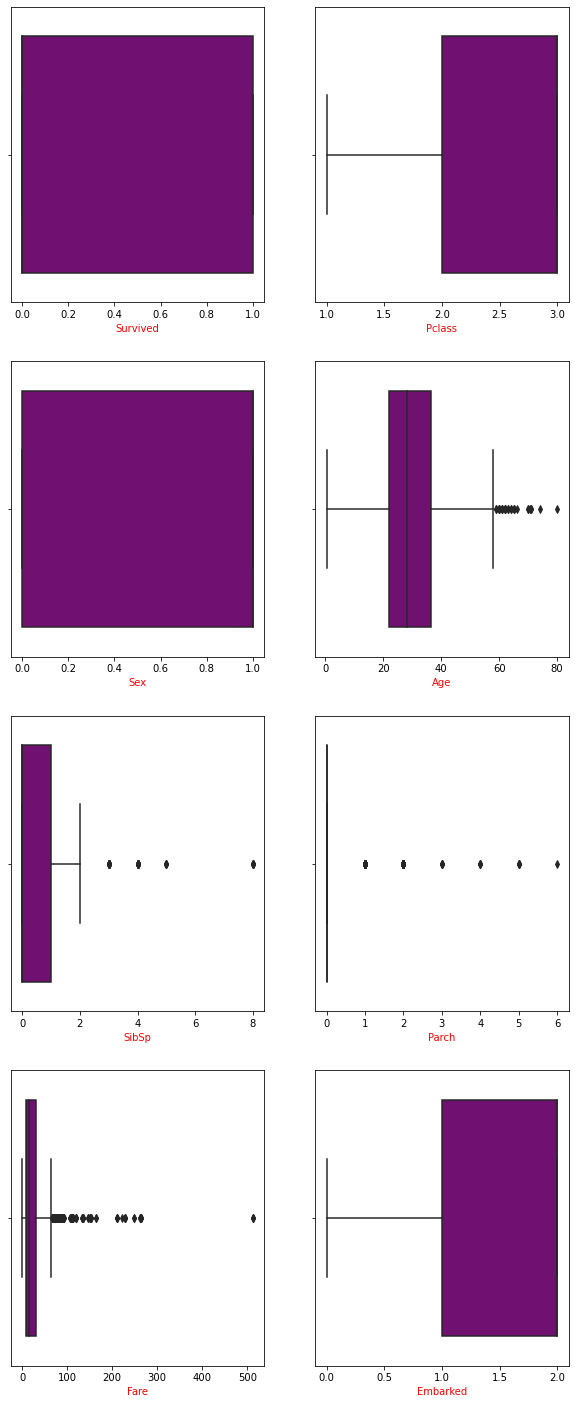

In [113]:
## let's plot the box and check if there any outliers in our dataset

plt.figure(figsize=(10, 25))

graph = 1

for column in data:
    if graph <= 8:
        ax = plt.subplot(4,2,graph)
        sns.boxplot(data[column],color='purple',orient='v')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()


## From this boxplot we can see that some columns have outliers higher side. like  __'Fare' , 'Age','SibSp'__

## let's remove the ourliers from 'Fare' columns since it have __continuous data__.

### Age have continuous data but some people maybe more old on Titanic so this can cause ouliers.

#### Outliers Dectection Formula
### Higher side ===> Q3 + (1.5 * IQR)
### lower side ===> Q1 - (1.5 * IQR)
### IQR = Inter Quantile Rate = Q3 - Q1

In [114]:
# Finding the IQR (Inter Quantile Range) to identify Outliers

# 1st Quantile
q1 = data.quantile(0.25)

# 3rd Quantile
q3 = data.quantile(0.75)

# IQR 
iqr = q3 -q1

In [117]:
# Validation one outlier

fare_high = (q3.Fare + (1.5 *iqr.Fare))
fare_high 

65.6344

### This means from the column Fare all the record values greather than 65.6344 (Fare > 65.6344) are Outlier higher side.

In [119]:
## let's get the indexes of all those column

indexes = np.where(data['Fare'] > fare_high)
indexes

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879]),)

## more than 10% of our data have fare greater than __fare_high  = 65.6344__.  So we will not remove the outliers.

## Before build the model ,let's check our label data classes and see whether the both classes are balanced or not.

## we have class Yes = 1 
## we class No = 0

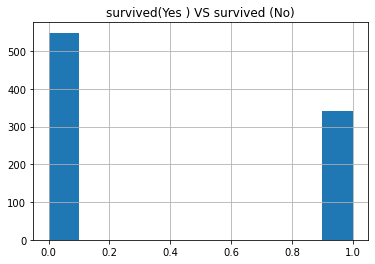

In [120]:
data['Survived'].hist(grid=True)
plt.title('survived(Yes ) VS survived (No)')
plt.show()


### From this histogram we can see that the classes are imbalance and  survived (No ) is majority and survived (Yes ) is the minority.

### Handling class imbalance using oversampling the minority class.

In [ ]:
#!pip install imblearn

In [121]:
## importang the libraries
from imblearn.over_sampling import SMOTE

SM = SMOTE()

In [122]:
## let's first split our dataset into label and features
x = data.drop('Survived',axis=1)
y = data.Survived

In [123]:
x_over , y_over = SM.fit_resample(x, y)

In [124]:
## let's verify
y_over.value_counts()


0    549
1    549
Name: Survived, dtype: int64

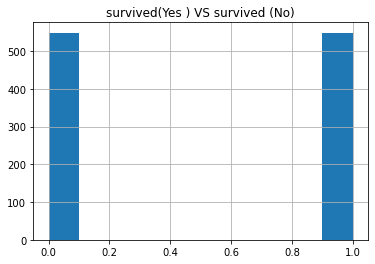

In [125]:
## let's plot again the histgram
y_over.hist(grid=True)
plt.title('survived(Yes ) VS survived (No)')
plt.show()


### Now we can see that our both classes of the label are balanced


#### ******************************************************

## Now let's build the models.

In [127]:
## first with LogisticRegression

from sklearn.linear_model import LogisticRegression

In [128]:

max_accu = 0
max_RS = 0
for i in range(1,200):
    x_train, x_test, y_train,y_test = train_test_split(x_over,y_over,
                                                    test_size=30,
                                                    random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc > max_accu:
        max_accu = acc
        max_RS = i
print('Best accuracy is :',max_accu, 'on Random_state',max_RS)

Best accuracy is : 1.0 on Random_state 190


## this code above help us to find the best random_state = 190

In [129]:
## let's build gain the model using it

x_train, x_test, y_train,y_test = train_test_split(x_over,y_over,
                                                    test_size=30,
                                                    random_state=190)
lr = LogisticRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

1.0
[[13  0]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## We built the first model using LogisticRegression Algorithum and the accuracy is : 100%

#### ******************************************************************

# let's build a second model using DecisionTreeClassifier algorithum

In [130]:
## import the libraries
from sklearn.tree import DecisionTreeClassifier

In [131]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(accuracy_score(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))
print(classification_report(y_test,pred_dt))

0.9333333333333333
[[12  1]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.94      0.94      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### We built the Second model using DecisionTreeClassifier Algorithum and the accuracy is : 93%¶

#### ******************************************************************

# let's build a Third model using algorithum RandomForestClassifier algorithm

In [134]:
## import the libraries
from sklearn.ensemble import RandomForestClassifier

In [135]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

print(accuracy_score(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test,pred_rf))

1.0
[[13  0]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## We built the Third model using RandomForestClassifier() Algorithum and the accuracy is : 100%

#### ******************************************************************

# let's build the fouth model using algorithum __SVC classification Alagorithum.__

In [136]:
## import the libraries
from sklearn.svm import SVC # Suport Vector Machine model

In [137]:
svc = SVC()

svc.fit(x_train, y_train)

pred_svc = rf.predict(x_test)

print(accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

1.0
[[13  0]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## We built the Third model using SVC() Algorithum and the accuracy is : 100%

#### ******************************************************************

## Let's go for __cross validation score__  and see if there no overfitting and wich model performe well.

In [138]:
from sklearn.model_selection import cross_val_score

In [143]:
## first model lr

scr = cross_val_score(lr,x_over,y_over,cv=7)
print('Cross Validation Score of LogisticRegression model:',scr.mean())

Cross Validation Score of LogisticRegression model: 0.8097046265836073


In [144]:
## first model dt

scr = cross_val_score(dt,x_over,y_over,cv=7)
print('Cross Validation Score of DecisionTreeClassifier model:',scr.mean())

Cross Validation Score of DecisionTreeClassifier model: 0.8297753202211801


In [145]:
## first model dt

scr = cross_val_score(rf,x_over,y_over,cv=7)
print('Cross Validation Score of  RandomForestClassifier model:',scr.mean())

Cross Validation Score of  RandomForestClassifier model: 0.8388395044446


In [146]:
## first model dt

scr = cross_val_score(svc,x_over,y_over,cv=7)

print('Cross Validation Score of Suport Vector Machine model:',scr.mean())

Cross Validation Score of Suport Vector Machine model: 0.6548493968876133


## let's check the defferences of model accuracy and cross_val_score each model.


In [148]:
print('\nLogisticRegression model diff is:',100 -80)
print('\nDecisionTreeClassifier model diff is:',93 -82)
print('\nRandomForestClassifier  model diff is:',100 -83)
print('\nSuport Vector Machine model diff is:',100 -65)


LogisticRegression model diff is: 20

DecisionTreeClassifier model diff is: 11

RandomForestClassifier  model diff is: 17

Suport Vector Machine model diff is: 35


## The __minimum__ defference in accuracy and cross validation score is for __DecisionTreeClassifier__ model, So it is our best model

### __Let's go for Hyper Parameter tuning and see if we can impore our model.__

In [149]:
from sklearn.model_selection import GridSearchCV

In [170]:
grid_params = {
          'max_depth':[int(x) for x in np.linspace(2,stop=15,num=8)],
          'min_samples_leaf':[int(x) for x in np.linspace(2,stop=15,num=7)],
          'min_samples_split':[int(x) for x in np.linspace(2,stop=15,num=7)],
          'criterion':['gini','entropy']
}


In [171]:
grid_search = GridSearchCV(estimator=dt,
                         param_grid=grid_params,
                         cv=5,
                         n_jobs=-1)

In [172]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 9, 11, 13, 15],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 15],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 15]})

In [175]:
# checking best parameters

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 8, 'min_samples_split': 4}


## Now with GridSearchCV we got the best parameters: __{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 8, 'min_samples_split': 4}__

In [176]:
## so let's build again the decisionTreeClassifier

dt_ = DecisionTreeClassifier(criterion='gini',
                            max_depth=11,
                            min_samples_leaf=8,
                            min_samples_split=4)


In [177]:
dt_.fit(x_train, y_train)

pred_dt_ = dt.predict(x_test)
print(accuracy_score(y_test, pred_dt_))
print(confusion_matrix(y_test, pred_dt_))
print(classification_report(y_test,pred_dt_))

0.9333333333333333
[[12  1]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.94      0.94      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### after paramter turning we got the same accuracy: 93%

## Conclusion: we build 4 models and  DecisionTreeClassifier is the best __93% accuracy.__

### ************ ************ ************ ************ ************

### let's save the model.


In [178]:
import joblib

In [179]:
joblib.dump(dt_,'Titanic_model.pkl')

['Titanic_model.pkl']

In [180]:
pwd

'/Users/olivierla412/projects/DataTrained_live_classes/Projects/Practice_Project _5'